# Project Description

This notebook will guide you through implementation of **multivariate linear regression** to to solve the **polynomial regression** problem:

$$
h_{w}(x) = w_0 + w_1 x + w_2 x^2 +  w_3 x^3 + w_4 x^4
= \boldsymbol{w}^T \mathbf{x}
$$

$$
\boldsymbol{w} = \begin{bmatrix}w_0 & w_1 & w_2 & w_3 & w_4\end{bmatrix}^T, 
\qquad
\mathbf{x} = \begin{bmatrix}1 & x & x^2 & x^3 & x^4\end{bmatrix}^T
$$

Below, you will

1. Implement the squared error function for multivarate linear regression
1. Implement gradient descent for multivariate linear regression
1. Experiment with feature normalization to improve the convergence of gradient descent

## Imports
Run this code.

In [24]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Helper functions
Review the helper functions in `mlr`. 

## Create a data set for polynomial regression

Read ``generate_data`` in ``mlr`` and then call it to generate training data.  

In [2]:
from mlr import generate_dataset
x, y = generate_dataset()

Plot the resulting data.   In general, your plots should be nice with labeled axes, title, etc.

Text(0.5, 1.0, 'Plot of generated dataset')

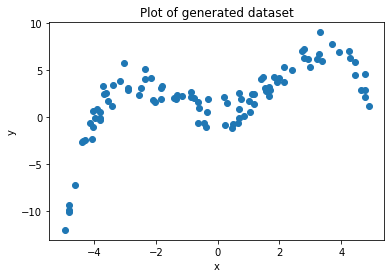

In [6]:
# TODO: your code here
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of generated dataset')

## Non-linear transformation

This data is clearly non-linear.  Simple linear regression will yield a poor fit to this data.

We will use a non-linear feature transformation, $x \mapsto [1, x, x^2, x^3, x^4]$, to feed into multivariate regression.  By fitting a "line" through these features, we are effectively fitting a polynomial of degree 4.

In [8]:
from mlr import feature_expansion
d = 4
X = feature_expansion(x, d)

[ 0.48813504  2.15189366  1.02763376  0.44883183 -0.76345201  1.45894113
 -0.62412789  3.91773001  4.63662761 -1.16558481  2.91725038  0.2889492
  0.68044561  4.25596638 -4.28963942 -4.128707   -4.79781603  3.32619846
  2.78156751  3.70012148  4.78618342  2.99158564 -0.38520638  2.80529176
 -3.81725574  1.39921021 -3.56646713  4.44668917  0.21848322 -0.8533806
 -2.35444388  2.74233689 -0.43849668  0.68433949 -4.812102    1.17635497
  1.12095723  1.16933997  4.43748079  1.81820299 -1.40492099 -0.62968046
  1.97631196 -4.39774528  1.66766715  1.7063787  -2.89617439 -3.71073702
 -1.84571649 -1.36289229  0.7019677  -0.61398487  4.88373838 -3.97955189
 -2.91123244 -3.38690482  1.53108325 -2.46708397 -0.33689227 -2.55574408
 -3.41030416 -3.89624859  1.56329589 -3.61817049 -3.03417638 -1.31274829
  3.2099323  -4.02898724  3.37944907 -4.03901592  4.76459465 -0.31348798
  4.76761088  1.0484552   2.39263579 -4.60812208 -2.17193037 -3.79803439
 -2.03859802 -3.81272281 -1.82016821 -0.85737005 -4.3

## Code reflection

The function ``feature_expansion`` accepts an vector of $n$ scalar x values and returns an $n \times 5$ data matrix by applying the feature expansion $x \mapsto [1, x, x^2, x^3, x^4]$ to each scalar $x$ value.  

In the space below, explain what is happening in each line of ``feature_expansion``.

The first two lines of the function serve to validate the input passed to the function. The behavior of the function is defined for a one-dimensional input array, therefore the code returns an error if this is not the case.

The next line uses list comprehension to create ``x_powers``, a list containing d arrays of length $n$, equal to $x^0,x^1 ... x^d$. This contains all of the new features we will need, but not in the proper shape.

The last line (not counting the return) "stacks" the individual lists together on ``axis=1``, meaning each set is treated as a column in a new matrix that is of shape $n\times d$. We thus have the features in the desired shape, and return ``X``.

## Implement the error function
Complete ``error_function`` which should compute the squared error for multivariate linear regression.  

$$ E_{in}(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^N \left(f(x^{(i)}) - h_{\mathbf{w}}(x^{(i)}) \right)^2 $$

Your implement should be *general* and work for any input data and weights (and not specific to this degree 4 polynomial stuff).

## Test the error function
Run this to test your error function.

In [20]:
from mlr import error_function

# generate a few different weight vectors
np.random.seed(1)
w_random = np.random.rand(d+1)
w_zeros  = np.zeros(d+1)
w_ones   = np.ones(d+1)

print("Error function (random): %.2f" % error_function(X, y, w_random))  # prints 1090.47
print("Error function  (zeros): %.2f" % error_function(X, y, w_zeros))   # prints 16.91
print("Error function   (ones): %.2f" % error_function(X, y, w_ones))    # prints 50493.62

Error function (random): 1090.47
Error function  (zeros): 16.91
Error function   (ones): 50493.62


## First training algorithm: normal equations

The function ``normal_equations`` has been provided for you.  It returns the best-fit weight vector using the closed form solution.  This may be helpful in debugging your code.

Error function: 0.97


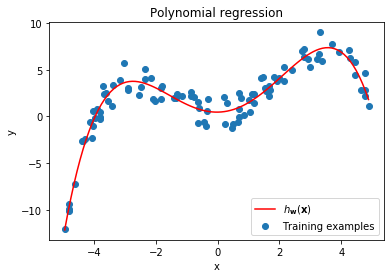

In [21]:
from mlr import normal_equations, plot_model

w_best = normal_equations(X, y)

plot_model(x, y, w_best)
print ("Error function: %.2f" % error_function(X, y, w_best))

## Implement second training algorithm: (vectorized) gradient descent

Implement gradient descent for multivariate linear regression. Make sure your solution is vectorized.  Your implementation should go in ``gradient_descent`` in ``mlr``.  Your implementation should be general and work for any X, y training data (i.e., not limited to the specific degree 4 polynomial data in this project).

## Use gradient descent to train the model
* Write code to call your ``gradient_descent`` method to learn weights
* Plot the model fit (use ``plot_model``)
* Plot the error function vs. iteration to help assess convergence
* Print the final value of the error function
* Experiment with different step sizes and numbers of iterations until you can find a good hypothesis. Try to match the error runction value from ``normal_equations`` to two significant digits. How many iterations does this take?

In [44]:
# TODO: write code here, feel free to add helper methods to mlr.py
from mlr import gradient_descent
gradient_descent(X,y,0.00001,100)

[  193.80288882   601.97561913   890.03778613 11069.01696866
  -560.24439505]
[ 0.00193803  0.00601976  0.00890038  0.11069017 -0.00560244]
[   315.72275685   -872.43903644   2977.55800695 -15559.05423999
  36913.93966718]
[ 0.00315723 -0.00872439  0.02977558 -0.15559054  0.3691394 ]
[   -4555.6576777      4123.44076705   -85111.77319811    67383.29184309
 -1682723.43915323]
[ -0.04555658   0.04123441  -0.85111773   0.67383292 -16.82723439]
[  213752.07549843  -140184.51633957  3872095.51086904 -2201625.89285458
 75781834.23715433]
[  2.13752075  -1.40184516  38.72095511 -22.01625893 757.81834237]
[-9.61381438e+06  6.25103902e+06 -1.74279624e+08  9.80302435e+07
 -3.41189970e+09]
[   -96.13814378     62.51039017  -1742.7962367     980.30243537
 -34118.9970216 ]
[ 4.32843260e+08 -2.81356978e+08  7.84648961e+09 -4.41210376e+09
  1.53611303e+11]
[   4328.43259839   -2813.56978224   78464.89607451  -44121.03764259
 1536113.0262231 ]
[-1.94875498e+10  1.26672089e+10 -3.53266245e+11  1.986407

(array([ 1.11920435e+159, -7.27499963e+158,  2.02887032e+160,
        -1.14082868e+160,  3.97193495e+161]),
 array([2.35819334e+001, 6.20442024e+003, 1.25217998e+007, 2.53816028e+010,
        5.14484922e+013, 1.04286060e+017, 2.11387776e+020, 4.28482883e+023,
        8.68534525e+026, 1.76051892e+030, 3.56857069e+033, 7.23349046e+036,
        1.46622804e+040, 2.97204329e+043, 6.02432980e+046, 1.22113126e+050,
        2.47523226e+053, 5.01729418e+056, 1.01700520e+060, 2.06146888e+063,
        4.17859608e+066, 8.47001152e+069, 1.71687078e+073, 3.48009595e+076,
        7.05415222e+079, 1.42987620e+083, 2.89835811e+086, 5.87497000e+089,
        1.19085604e+093, 2.41386441e+096, 4.89290158e+099, 9.91790830e+102,
        2.01035937e+106, 4.07499712e+109, 8.26001650e+112, 1.67430481e+116,
        3.39381475e+119, 6.87926028e+122, 1.39442561e+126, 2.82649980e+129,
        5.72931325e+132, 1.16133142e+136, 2.35401803e+139, 4.77159301e+142,
        9.67201592e+145, 1.96051700e+149, 3.97396667e+15

How many iterations does it take?

** *TODO: write your answer here* **

## Gradient descent with feature normalization

You should have observed that it takes many iterations of gradient descent to match the error function value achieved by the normal equations. Now you will implement feature normalization to improve the convergence of gradient descent. The formula for feature normalization is:

$$x^{(i)}_j \leftarrow \frac{x^{(i)}_j - \mu_j}{\sigma_j}$$

Here are some guidelines for the implementation:

* The values $\mu_j$ and $\sigma_j$ are the mean and standard deviation of
the $j$th column (i.e., feature) in the **training data**. (Hint:
there are numpy functions to compute these.)

* Do not normalize the first feature, $x_0$, which is the bias term and always equal to 1. (Optional question: why?)

* Use broadcasting to do the normalization---don't write for loops

* After normalizing the training data and running gradient descent to obtain a weight vector, you need to translate that weight vector back to the original unnormalized feature values.  See question below.

## Un-normalizing weights
How do you "unnormalize" the weights?  Let's use $\mathbf{\hat{w}} = [\hat{w}_0, \hat{w}_1, \dots, \hat{w}_d]^t$ to denote the weights found on the *normalized* training data.  The key is unnormalizing is to make sure you make the *same* prediction on the unnormalized data as you make on the normalized data.

Let $\mathbf{x}$ be a training example and let $\mathbf{\hat{x}}$ be this same example after normalization.  Since $\mathbf{\hat{x}}$ is normalized, $\hat{x}_j = \frac{x_j - \mu_j}{\sigma_j}$ for each feature $j = 1 \dots d$; note that $\hat{x}_0$ is not normalized, so $\hat{x}_0 = x_0 = 1$.

Our prediction on a normalized example is:
$h_{\mathbf{\hat{w}}}(\mathbf{\hat{x}}) = \sum_{j=0}^d\hat{w}_j \hat{x}_j = \hat{w}_0 x_0 + \sum_{j=1}^d\hat{w}_j \frac{x_j - \mu_j}{\sigma_j}$.

Our prediction on an unnormalized example is simply:
$h_{\mathbf{{w}}}(\mathbf{{x}}) = \sum_{j=0}^d {w}_j {x}_j$.  But the question is: how do we derive $\mathbf{w}$ from $\mathbf{\hat{w}}$?


Write an expression for the unnormalized weights.  The $w_j$ terms should be fairly simple except for $w_0$ which be a little messy.  Your solution for $\mathbf{{w}}$ should satisfy: $h_{\mathbf{{w}}}(\mathbf{{x}}) = h_{\mathbf{\hat{w}}}(\mathbf{\hat{x}})$ for any $\mathbf{x}$ and its corresponding normalized version $\mathbf{\hat{w}}$.

** *TODO: write your answer here* ** 


## Repeat experiment
Follow the same steps as above to experiment with gradient descent using the *normalized* training: print the value of the error function, and create the same plots. Tune the step size and number of iterations again to make gradient descent converge as quickly as possible. How many iterations does it take to match the Error function value from ``normal_equations`` to two decimal places?  

In [ ]:
# TODO: write code here, feel free to add helper methods to mlr.py

How many iterations, after feature normalization, does it take?

** *TODO: write your answer here* **